# Software Engineering for Economists

## Building Confidence in a Model

* ***Verification*** How accurately does the computaitonal solve the underlying equations of the model for the quantities of interest?

* ***Validation*** How accurately does the model represent the reality for the quantities of interest?

* ***Uncertainty Quantification*** How doe the varouous sources of error and uncertainty feed into uncertainty in the model-based prediction of the quantities of interest.

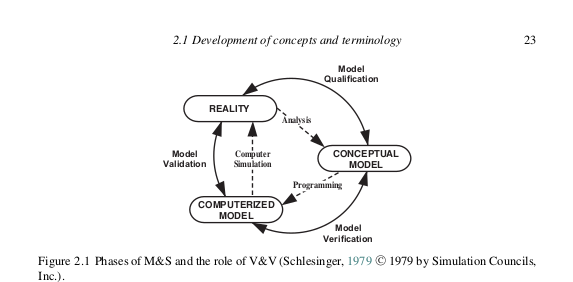

In [14]:
from IPython.display import Image
Image(filename='images/conceptual_model.png', width=1000)

Basic software engineering skills will allow us to increase the transparency of our implementations and expand the set of possible economic questions we can address. In this lecture, we will look at a selected components of a sound software engineering workflow.

* Version Control

* Testing

* Code Review

* Profiling

* Continous Integration Workflow

## Michael Keane in the Computational Economics Colloquium

As an aside, for those interested in structural microeconometrics, we were lucky enough to have [Prof. Keane](http://www.economics.ox.ac.uk/Academic/michael-keane) talk about the process of devloping, estimating, and validating in the [*Computation Economics Colloquium*](http://bfi.uchicago.edu/events/computational-economics-colloquium). The video of his presentation is available [online](http://bfi.uchicago.edu/video/practical-issues-structural-estimation).

## Research Example

Ambiguity in Dynamic Models of Educational Choice

* Plausible

    * better description of agent decision problem
    
* Meaningful

    * reinterpretation of economic phenomenon
    * reevaluation of policy interventions

* Tractable

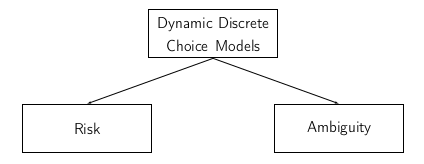

In [15]:
from IPython.display import Image
Image(filename='images/structure_literature.png', width=1000, height=1000)

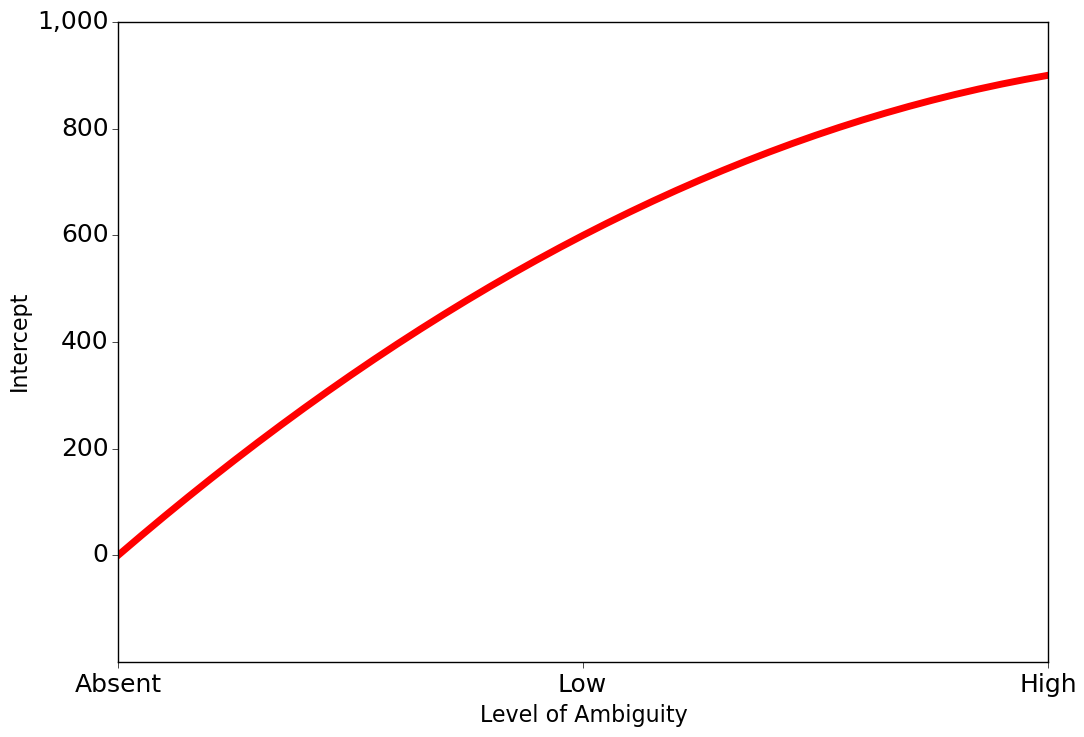

In [16]:
from IPython.display import Image
Image(filename='images/indifference_curve.png', width=1000, height=1000)

## Computational Challenges and Software Engineering

* ensure correctness of implementation

* manage numerous numerical components

* address performance constraints

* guarantee recomputability and extensibility

* ...

$\Rightarrow$ building, documenting, and communicating expertise

## Running Example

Throughout this lecture we will work with a simple example from expected utility theory. We consider a simple utility function that captures an agent's preferences over uncertain outcomes.

$$ u(x) = x^\alpha,$$

where $\alpha, x > 0$. We can calculate the expected utility (EU) as:

$$E U= \int^{-\infty}_{\infty} u(x) f(x)dx,$$

where $f(x)$ is the probablity density function of the realizations of $x$. In our case, $x$ is drawn from a lognormal distribution with mean $\mu$ and standard deviation $\sigma$. To solve the integral, we implement a simple Monte Carlo Iitegration. See Skrainka & Judd (2013) for the importance of choosing the right integration strategy.

In [17]:
# SciPy Stack
import numpy as np

In [18]:
def get_expected_utility(alpha, mean, sd):
    """ Get the expected returns by drawing numerous
    random deviates from a lognormal distribution.
    """
    # Guard interface
    assert (isinstance(mean, float))
    assert (isinstance(sd, float))
    assert (isinstance(alpha, float))
    assert (sd >= 0.00)
    assert (alpha >= 0.00)
    
    # Set parametrization for Monte Carlo 
    # integration.
    num_draws = 10000000
    
    # Draw ten-thousand deviates from the 
    deviates = get_random_deviates(mean, sd, num_draws)
    
    # Calculate the average utility from all deviates.
    rslt = np.mean(deviates ** alpha)
    
    # Check result
    assert (isinstance(rslt, float))
        
    # Finishing
    return rslt

In [19]:
def get_random_deviates(mean, sd, num_draws):
    """ Get random deviates from a lognormal 
    distribution.
    """
    # Draw deviates from lognormal distribution.
    deviates = []
    for _ in range(num_draws):
        deviate = np.random.lognormal(mean, sd)
        deviates += [deviate]
    
    # Type Conversion
    deviates = np.array(deviates)
    
    # Finishing
    return deviates

## Version Control

Version Control records changes to a file or set of files over time so that you can recall (and compare) specific versions later. This part of the lecture draws heavily on the free e-book [*Pro Git*](http://www.git-scm.com/book/en/v2).

Tracking changes to your code over time has a variety of benefits:

* Traceability

* Clarity

* Reduced duplication and error

Let us turn to the terminal and work through an example. We will do the following:

* Set up a local repository

* Commit files to repository

* Track changes to files 

* Compare different versions of files

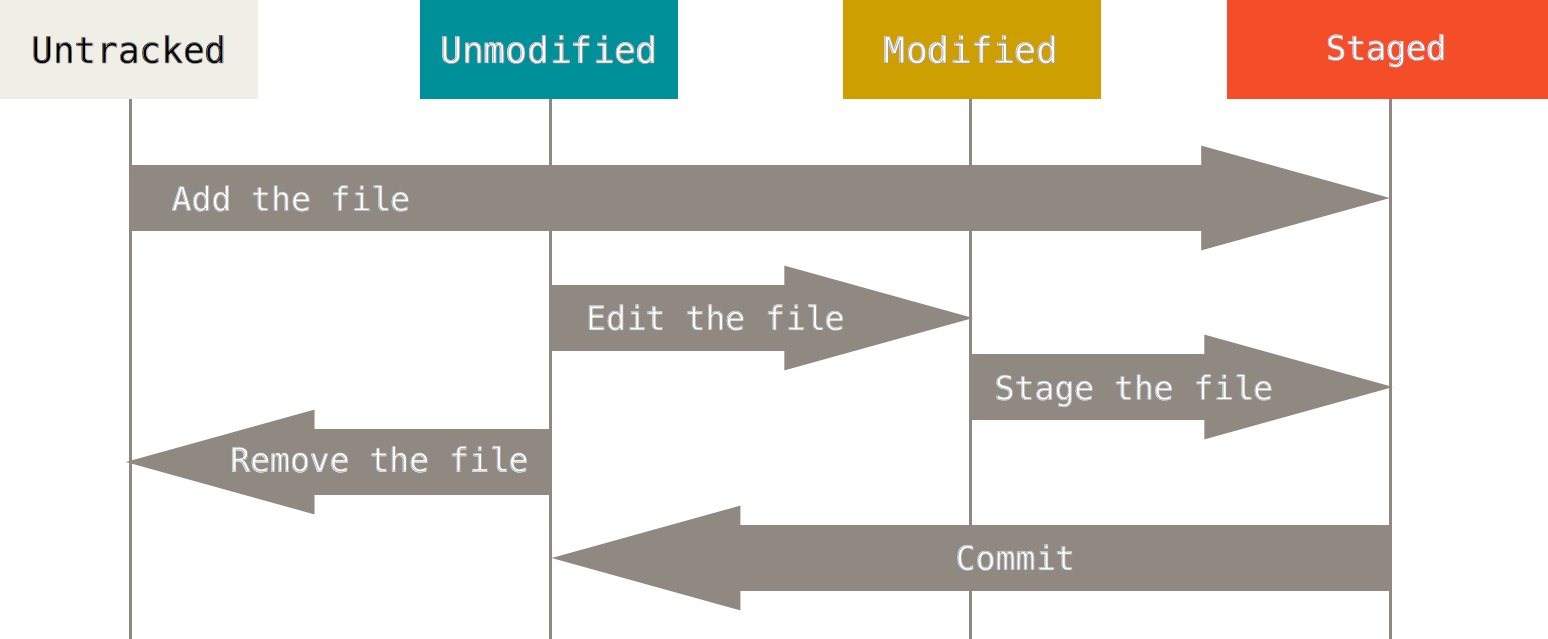

In [20]:
from IPython.display import Image
Image(filename='images/lifecycle.png')

Once you are familiar with the basic workflow, sign up for an account on [*GitHub*](https://github.com) and start using a remote repository. Among other benefits, you then have a backup copy of your files and can establish a tranparent workflow with your co-authors. Let us check out the repository for my current research on ambiguity [here](https://github.com/robustToolbox).

For a more detailed look at what *Git* has to offer, check out the lectures and further readings at [*Software Carpentry*](http://swcarpentry.github.io/git-novice/).

## Testing

Types of Tests:

* Unit Tests

* Integration Tests

* Regression Tests


In [21]:
def generate_random_request():
    """ Generate a random admissible request.
    """
    # Draw random deviates that honor the suppert
    # constraints.
    mean = np.random.normal()
    alpha, sd = np.random.uniform(size=2)

    # Finishing
    return alpha, mean, sd

In [22]:
# Generate and evaluate a random request.
alpha, mean, sd = generate_random_request()
rslt = get_expected_utility(alpha, mean, sd)
# Print out request and result
print('Request: {0:.3f}, {1:.3f}, {2:.3f}  Result: {3:.3f}'.format(alpha, mean, sd, rslt))

Request: 0.664, 0.017, 0.787  Result: 1.159


In [24]:
def test_random_requests():
    """ Draw a whole host of random requests to 
    ensure that the function works for all admissible 
    values.
    """    
    for _ in range(5):
        # Get expected returns.
        alpha, mean, sd = generate_random_request()
        get_expected_utility(alpha, mean, sd)


def test_results():
    """ Test some previous knowledge about the results.
    """
    for _ in range(5):
        # Get expected returns.
        alpha, mean, sd = generate_random_request()
        rslt = get_expected_utility(alpha, mean, sd)
        # Assertions
        assert rslt > 0   


In [25]:
def test_closed_form():
    """ Test the simulated result against the closed 
    form solution in the special case of linear utility.
    """
    for _ in range(1):
        _, mean, sd = generate_random_request()
        alpha = 1.0
        # Get expected returns using simulation.
        simulated = get_expected_utility(alpha, mean, sd)
        # Get expected returns using closed form.
        closed = np.exp(mean + (sd ** 2) * 0.5)
        # Assertions. Note the small number of decimal points
        # required. Given the precision of the Monte Carlo integration
        # this test if bound to fail sometimes.
        np.testing.assert_almost_equal(closed, simulated, decimal=3)

In principle, we can now run our tests one-by-one:

In [26]:
test_random_requests()

test_results()

test_closed_form()

How about test automation? Let us now run our test battery in the terminal. See our repository [here](https://github.com/softEcon/talks/blob/master/ZICE/software_engineering/tests.py) for the script. We are using [*py.test*](http://pytest.org). As usual, several alternatives exist: (1) [*nose*](https://nose.readthedocs.org/en/latest/), (2) [unittest](https://docs.python.org/2/library/unittest.html#module-unittest).

In [27]:
%%bash
py.test tests.py --verbose 

============================= test session starts ==============================
platform linux2 -- Python 2.7.10, pytest-2.8.5, py-1.4.31, pluggy-0.3.1 -- /home/peisenha/.envs/softEcon/bin/python
cachedir: .cache
rootdir: /home/peisenha/Dropbox/@office/teaching/lectures/softEcon/talks/ZICE/software_engineering, inifile: 
plugins: cov-2.2.0
collecting ... collected 3 items

tests.py::test_random_requests PASSED
tests.py::test_results PASSED
tests.py::test_closed_form FAILED

=================================== FAILURES ===================================
_______________________________ test_closed_form _______________________________

    def test_closed_form():
        """ Test the simulated result against the closed
        form solution in the special case of linear utility.
        """
        for _ in range(1):
            _, mean, sd = generate_random_request()
            alpha = 1.0
            # Get expected returns using simulation.
            simulated = get_expected_utilit

How do we know how much of our code base we in fact cover with our testing efforts so far?

In [8]:
%%bash
py.test tests.py --cov=sandbox

================================================================================================================================ test session starts ================================================================================================================================
platform linux2 -- Python 2.7.10, pytest-2.8.5, py-1.4.31, pluggy-0.3.1
rootdir: /home/peisenha/Dropbox/@office/teaching/lectures/softEcon/talks/ZICE/software_engineering, inifile: 
plugins: cov-2.2.0
collected 3 items

tests.py ..F

===================================================================================================================================== FAILURES ======================================================================================================================================
_________________________________________________________________________________________________________________________________ test_closed_form _______________________________________________________________

## Automated Code Review


There are multiple dimensions to code quality:

* Correctness

* Maintainability

* Readability

* Scalabilty

There are several tools out there that I found useful in the past to improve the quality of my code along these dimensions (1) [*QuantifiedCode*](https://www.quantifiedcode.com/) and (2) [*Codacy*](https://www.codacy.com). Let us visit *QuantifiedCode* online and take a look around.

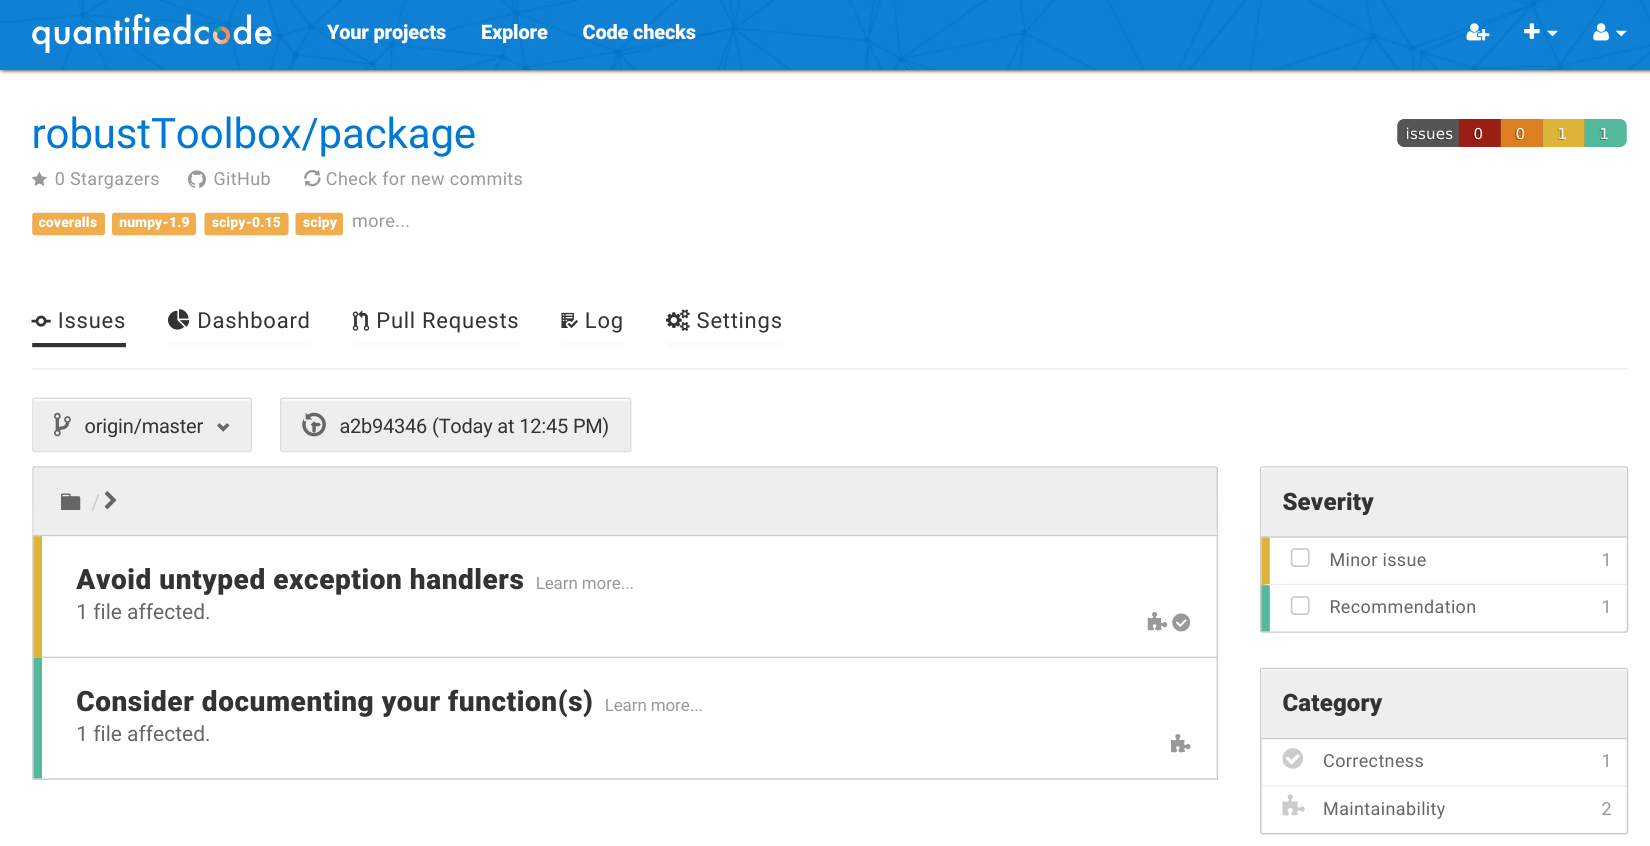

In [1]:
from IPython.display import Image
Image(filename='images/quantifiedcode.png')

Using these tools helps you to improve your own programming skills over time as each of the issues is well explained and best practices provided. More lightweight solutions are also available: (1) [*Pylint*](http://www.pylint.org/), (2) [*Pyflakes*](https://github.com/pyflakes/pyflakes), and (3) [*pep8*](https://github.com/PyCQA/pep8).

## Profiling

In [30]:
%load_ext snakeviz

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [31]:
# standard library
import cProfile

import sandbox
from sandbox import get_expected_utility

# As a start, let us start with a table of profile data.
cProfile.run("get_expected_utility(1.0, 0.0, 1.0)")

         100021 function calls in 0.070 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.070    0.070 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 _methods.py:43(_count_reduce_items)
        1    0.000    0.000    0.000    0.000 _methods.py:53(_mean)
        1    0.000    0.000    0.000    0.000 fromnumeric.py:2785(mean)
        1    0.000    0.000    0.000    0.000 numeric.py:476(asanyarray)
        1    0.045    0.045    0.066    0.066 sandbox.py:40(get_random_deviates)
        1    0.000    0.000    0.070    0.070 sandbox.py:8(get_expected_utility)
        1    0.000    0.000    0.000    0.000 {hasattr}
        6    0.000    0.000    0.000    0.000 {isinstance}
        1    0.000    0.000    0.000    0.000 {issubclass}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
   100000    0.020    0.000    0.020    0.000 {method 'l

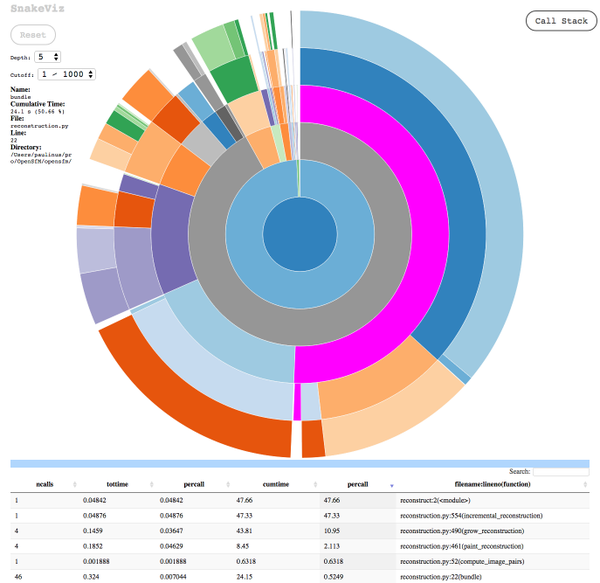

In [32]:
from IPython.display import Image
Image(filename='images/snakeviz.png', width=950, height=1000)

Let us inspect our code.

In [38]:
cProfile.run("get_expected_utility(1.0, 0.0, 1.0)", "sandbox.prof")

In [39]:
%time rslt = get_expected_utility(1.0, 0.0, 1.0, version='slow')
print('')
%time rslt = get_expected_utility(1.0, 0.0, 1.0, version='fast')

cProfile.run("get_expected_utility(1.0, 0.0, 1.0, 'fast')", "sandbox_fast.prof")

CPU times: user 56 ms, sys: 4 ms, total: 60 ms
Wall time: 45.5 ms

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 7.34 ms


## Continuous Integration Workflow

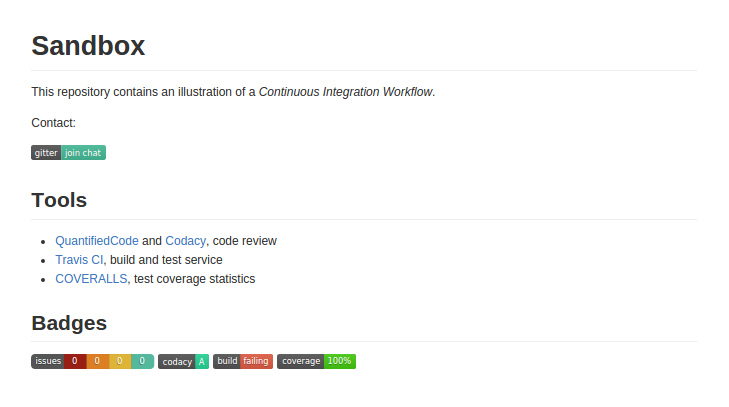

In [40]:
from IPython.display import Image
Image(filename='images/continous_integration.png', width=950, height=1000)

## Best Practices

* Set up a scalable workflow right from the beginning.

* Build your model in a hierarchical way.

* Develop a testing harness as you impelement and refine your code.

* Intiaially focus on the reability and then tackle performance issues.


## Next Steps

* Check out more detailed lectures at the *Software Engineering for Economists Initiative* [online](https://github.com/softEcon).
    * Contribute a lecture on a special topic of your choice. See [here](http://nbviewer.ipython.org/github/softEcon/specials/blob/master/toolkit_for_advanced_optimization/lecture.ipynb) for an example.
    
* Explore the material on [*Sofware Carpentry*](http://software-carpentry.org).
    
* Sign up for personal [*GitHub*](https://github.com/) account and create a remote repository.

* If you are using a Windows machine, download and install [*Ubuntu Desktop*](http://www.ubuntu.com/desktop).

* Set aside a day or two to establish an continuous integration workflow for your current research project.

## References

* Oberkampf, W. L., Roy, C. J. (2013). *Verifcation and Validation and Scientific Computing*. Cambridge University Press, Cambridge, England.

* National Research Council (2012). *Assessing the Reliability of Complex Models: Mathematical and Statistical Foundations of Verification, Validation, and Uncertainty Quantification*. The National Academies Press, Washington, DC.



* Schlesinger, S. (1979). Terminology for Model Credibility. *Simulation*. 32(3), 103–104.

* Skrainka, B, Judd, K. J. (2011). *High Performance Quadrature Rules: How Numerical Integration Affects a Popular Model of Product Differentiation*. Working Paper. 

* Wilson G, Aruliah DA, Brown CT, Chue Hong NP, Davis M, Guy RT, et al. (2014). *Best Practices for Scientific Computing*. PLOS Biology 12(1).

* P. Bourque and R.E. Fairley, eds. (2014). *Guide to the Software Engineering Body of Knowledge*. IEEE Computer Society.

## Contact

If you have any further questions or comments, please do not hesitate to let me know as [eisenhauer@policy-lab.org](). I also welcome any suggestions for improving this lecture.

In [28]:
import urllib; from IPython.core.display import HTML
HTML(urllib.urlopen('http://bit.ly/1K5apRH').read())